<a href="https://colab.research.google.com/github/DhrubaAdhikary/Learn_CV_with_Dhruv/blob/master/Harris_Corner_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from tabulate import tabulate

# 5x5 sample grayscale image
img = np.array([
    [10, 10, 10, 10, 10],
    [10, 10, 10, 10, 10],
    [10, 10,250,250,250],
    [10, 10,250,250,250],
    [10, 10,250,250,250],
], dtype=np.float32)


In [2]:
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])


In [9]:
import numpy as np
import pandas as pd
from scipy.signal import convolve2d
from tabulate import tabulate

# 1. Input 5x5 image
img = np.array([
    [10, 10, 10, 10, 10],
    [10, 10, 10, 10, 10],
    [10, 10, 250, 250, 250],
    [10, 10, 250, 250, 250],
    [10, 10, 250, 250, 250],
], dtype=np.float32)

# 2. Sobel kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

# 3. Convolutions
Ix = convolve2d(img, sobel_x, mode='same', boundary='symm')
Iy = convolve2d(img, sobel_y, mode='same', boundary='symm')
Ix2 = Ix ** 2
Iy2 = Iy ** 2
Ixy = Ix * Iy

# 4. Build results table
rows = []
for i in range(1, 4):
    for j in range(1, 4):
        patch = img[i-1:i+2, j-1:j+2]
        mult_x = patch * sobel_x
        mult_y = patch * sobel_y
        ix_val = Ix[i, j]
        iy_val = Iy[i, j]
        ixiy = ix_val * iy_val
        rows.append({
            "Point": f"({i},{j})",
            "Patch": str(patch.astype(int).tolist()),
            "Sobel_X Elementwise": str(mult_x.tolist()),
            "Sobel_Y Elementwise": str(mult_y.tolist()),
            "Ix": ix_val,
            "Iy": iy_val,
            "Ix*Iy": ixiy
        })


df = pd.DataFrame(rows)

# 5. Display table
print(tabulate(df, headers='keys', tablefmt='grid', showindex=False))


+---------+-----------------------------------------------------+--------------------------------------------------------------------+--------------------------------------------------------------------+------+------+---------+
| Point   | Patch                                               | Sobel_X Elementwise                                                | Sobel_Y Elementwise                                                |   Ix |   Iy |   Ix*Iy |
+=========+=====================================================+====================================================================+====================================================================+======+======+=========+
| (1,1)   | [[10, 10, 10], [10, 10, 10], [10, 10, 250]]         | [[-10.0, 0.0, 10.0], [-20.0, 0.0, 20.0], [-10.0, 0.0, 250.0]]      | [[-10.0, -20.0, -10.0], [0.0, 0.0, 0.0], [10.0, 20.0, 250.0]]      | -240 | -240 |   57600 |
+---------+-----------------------------------------------------+-----------------------

In [17]:
Ix,Iy,Ixy

(array([[   0.,    0.,    0.,    0.,    0.],
        [   0., -240., -240.,    0.,    0.],
        [   0., -720., -720.,    0.,    0.],
        [   0., -960., -960.,    0.,    0.],
        [   0., -960., -960.,    0.,    0.]]),
 array([[   0.,    0.,    0.,    0.,    0.],
        [   0., -240., -720., -960., -960.],
        [   0., -240., -720., -960., -960.],
        [   0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.]]),
 array([[     0.,      0.,      0.,      0.,      0.],
        [     0.,  57600., 172800.,     -0.,     -0.],
        [     0., 172800., 518400.,     -0.,     -0.],
        [     0.,     -0.,     -0.,      0.,      0.],
        [     0.,     -0.,     -0.,      0.,      0.]]))

In [19]:
Ix2,Iy2

(array([[     0.,      0.,      0.,      0.,      0.],
        [     0.,  57600.,  57600.,      0.,      0.],
        [     0., 518400., 518400.,      0.,      0.],
        [     0., 921600., 921600.,      0.,      0.],
        [     0., 921600., 921600.,      0.,      0.]]),
 array([[     0.,      0.,      0.,      0.,      0.],
        [     0.,  57600., 518400., 921600., 921600.],
        [     0.,  57600., 518400., 921600., 921600.],
        [     0.,      0.,      0.,      0.,      0.],
        [     0.,      0.,      0.,      0.,      0.]]))

In [10]:
gaussian_kernel = (1/16) * np.array([[1, 2, 1],
                                     [2, 4, 2],
                                     [1, 2, 1]])

# Step 5: Smooth gradient products
Sxx = convolve2d(Ix2, gaussian_kernel, mode='same', boundary='symm')
Syy = convolve2d(Iy2, gaussian_kernel, mode='same', boundary='symm')
Sxy = convolve2d(Ixy, gaussian_kernel, mode='same', boundary='symm')

# Step 6: Build table for center 3x3 points
rows = []
for i in range(1, 4):
    for j in range(1, 4):
        patch_Ix2 = Ix2[i-1:i+2, j-1:j+2]
        patch_Iy2 = Iy2[i-1:i+2, j-1:j+2]
        patch_Ixy = Ixy[i-1:i+2, j-1:j+2]
        rows.append({
            "Point": f"({i},{j})",
            "Ix² Patch": str(np.round(patch_Ix2, 1).tolist()),
            "Iy² Patch": str(np.round(patch_Iy2, 1).tolist()),
            "Ix·Iy Patch": str(np.round(patch_Ixy, 1).tolist()),
            "Sxx": np.round(Sxx[i, j], 2),
            "Syy": np.round(Syy[i, j], 2),
            "Sxy": np.round(Sxy[i, j], 2)
        })

# Step 7: Display
df = pd.DataFrame(rows)
print(tabulate(df, headers='keys', tablefmt='grid', showindex=False))



+---------+-----------------------------------------------------------------------------------+-----------------------------------------------------------------------------------+----------------------------------------------------------------------------+--------+--------+--------+
| Point   | Ix² Patch                                                                         | Iy² Patch                                                                         | Ix·Iy Patch                                                                |    Sxx |    Syy |    Sxy |
+=========+===================================================================================+===================================================================================+============================================================================+========+========+========+
| (1,1)   | [[0.0, 0.0, 0.0], [0.0, 57600.0, 57600.0], [0.0, 518400.0, 518400.0]]             | [[0.0, 0.0, 0.0], [0.0, 57600.0, 518400.0], [0.0, 57

In [12]:
k = 0.04  # Harris constant

for row in rows:
    Sxx_val = row["Sxx"]
    Syy_val = row["Syy"]
    Sxy_val = row["Sxy"]

    det_M = Sxx_val * Syy_val - Sxy_val ** 2
    trace_M = Sxx_val + Syy_val
    R = det_M - k * (trace_M ** 2)
    row["R"] = np.round(R, 2)

# Convert to DataFrame again to include R
df_r = pd.DataFrame(rows)

# Display R score
from tabulate import tabulate
print(tabulate(df_r[["Point", "Sxx", "Syy", "Sxy", "R"]], headers='keys', tablefmt='grid', showindex=False))


+---------+--------+--------+--------+-------------+
| Point   |    Sxx |    Syy |    Sxy |           R |
+=========+========+========+========+=============+
| (1,1)   | 118800 | 118800 |  90000 | 3.75529e+09 |
+---------+--------+--------+--------+-------------+
| (1,2)   | 118800 | 378000 | 126000 | 1.9158e+10  |
+---------+--------+--------+--------+-------------+
| (1,3)   |  39600 | 615600 |  54000 | 4.29028e+09 |
+---------+--------+--------+--------+-------------+
| (2,1)   | 378000 | 118800 | 126000 | 1.9158e+10  |
+---------+--------+--------+--------+-------------+
| (2,2)   | 378000 | 378000 | 176400 | 8.89056e+10 |
+---------+--------+--------+--------+-------------+
| (2,3)   | 126000 | 615600 |  75600 | 4.98514e+10 |
+---------+--------+--------+--------+-------------+
| (3,1)   | 615600 |  39600 |  54000 | 4.29028e+09 |
+---------+--------+--------+--------+-------------+
| (3,2)   | 615600 | 126000 |  75600 | 4.98514e+10 |
+---------+--------+--------+--------+--------

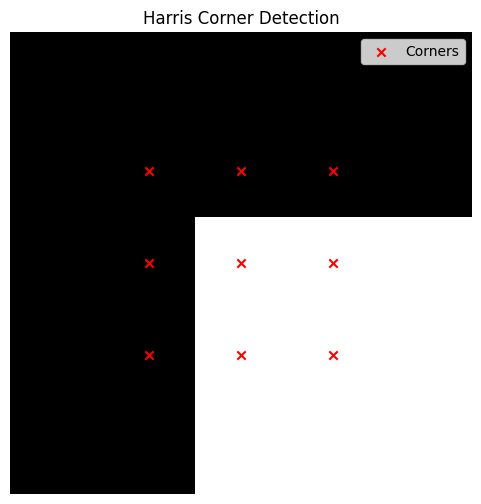

In [13]:
import matplotlib.pyplot as plt

# Step 1: Allocate full R-map
H = np.zeros_like(img)

# Step 2: Fill Harris R values in valid region
for i in range(1, 4):
    for j in range(1, 4):
        Sxx_val = Sxx[i, j]
        Syy_val = Syy[i, j]
        Sxy_val = Sxy[i, j]
        det_M = Sxx_val * Syy_val - Sxy_val ** 2
        trace_M = Sxx_val + Syy_val
        R = det_M - k * (trace_M ** 2)
        H[i, j] = R

# Step 3: Threshold (you can adjust this)
threshold = np.max(H) * 0.01
corners = (H > threshold)

# Step 4: Plot
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
ys, xs = np.where(corners)
plt.scatter(xs, ys, c='red', marker='x', label='Corners')
plt.title("Harris Corner Detection")
plt.legend()
plt.grid(False)
plt.axis('off')
plt.show()


In [14]:
from ipywidgets import interact, FloatSlider

def show_corners(threshold_ratio=0.01):
    threshold = np.max(H) * threshold_ratio
    corners = (H > threshold)

    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
    ys, xs = np.where(corners)
    plt.scatter(xs, ys, c='red', marker='x', label='Corners')
    plt.title(f"Harris Corners (Threshold: {threshold_ratio:.4f})")
    plt.legend()
    plt.axis('off')
    plt.grid(False)
    plt.show()

interact(show_corners, threshold_ratio=FloatSlider(value=0.01, min=0.0001, max=0.1, step=0.001))


interactive(children=(FloatSlider(value=0.01, description='threshold_ratio', max=0.1, min=0.0001, step=0.001),…

<function __main__.show_corners(threshold_ratio=0.01)>